In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

In [2]:
input_dir = os.path.join('tools', 'in')
in_files = os.listdir(input_dir)
print('ファイル数:', len(in_files))

ファイル数: 2000


In [3]:
def read_file(file_path):
    with open(file_path) as f:
        w, d, n = map(int, f.readline().split())
        a = []
        for _ in range(d):
            a.append(list(map(int, f.readline().split())))
    return w, d, n, a

read_file(os.path.join(input_dir, in_files[0]))

(1000,
 5,
 10,
 [[6508, 11666, 12167, 16717, 46095, 55928, 56542, 127260, 200961, 202211],
  [11754, 15667, 26620, 31851, 48890, 50181, 52520, 53150, 263650, 280526],
  [7171, 7218, 14268, 26231, 37133, 47199, 93385, 131356, 174634, 189807],
  [10290, 15811, 16235, 39805, 45168, 75830, 76161, 137648, 148368, 152504],
  [6553, 22994, 44284, 45120, 67646, 68899, 98726, 129109, 138615, 247097]])

In [4]:
def eda(w, d, n, a):
    Td = []
    for i in range(d):
        Td.append(sum(a[i]))
    Td_mean = round(np.mean(Td))
    Td_var = round(np.var(Td))
    E = w**2 - Td_mean
    e = round((E/(w**2))**(1/2), 4)
    diff_var = abs(Td_var - round((E**2)/12))
    # print('E: {}, e: {}, Td 平均: {}, 分散: {}, 分散予測: {}'.format(
    #     E, e, format(Td_mean, ','), format(Td_var, ','), format(round((E**2)/12), ',')))
    return E, e, Td, Td_mean, Td_var, diff_var

w, d, n, a = read_file(os.path.join(input_dir, in_files[0]))
eda(w, d, n, a)

(222774,
 0.472,
 [736055, 834809, 728402, 717820, 869043],
 777226,
 3870814086,
 264873837)

In [5]:
es, Tds, diff_vars = [], [], []
for f in in_files:
    w, d, n, a = read_file(os.path.join(input_dir, f))
    E, e, Td, Td_mean, Td_var, diff_var = eda(w, d, n, a)
    es.append(e)
    Tds.append(Td_mean)
    diff_vars.append(diff_var)
print('Tdの分散の変動係数:', round(np.std(diff_vars)/np.mean(diff_vars), 4))

Tdの分散の変動係数: 1.9025


                   0
count    2000.000000
mean   906070.351000
std     74581.177898
min    725038.000000
25%    850346.250000
50%    924769.000000
75%    972452.250000
max    997635.000000


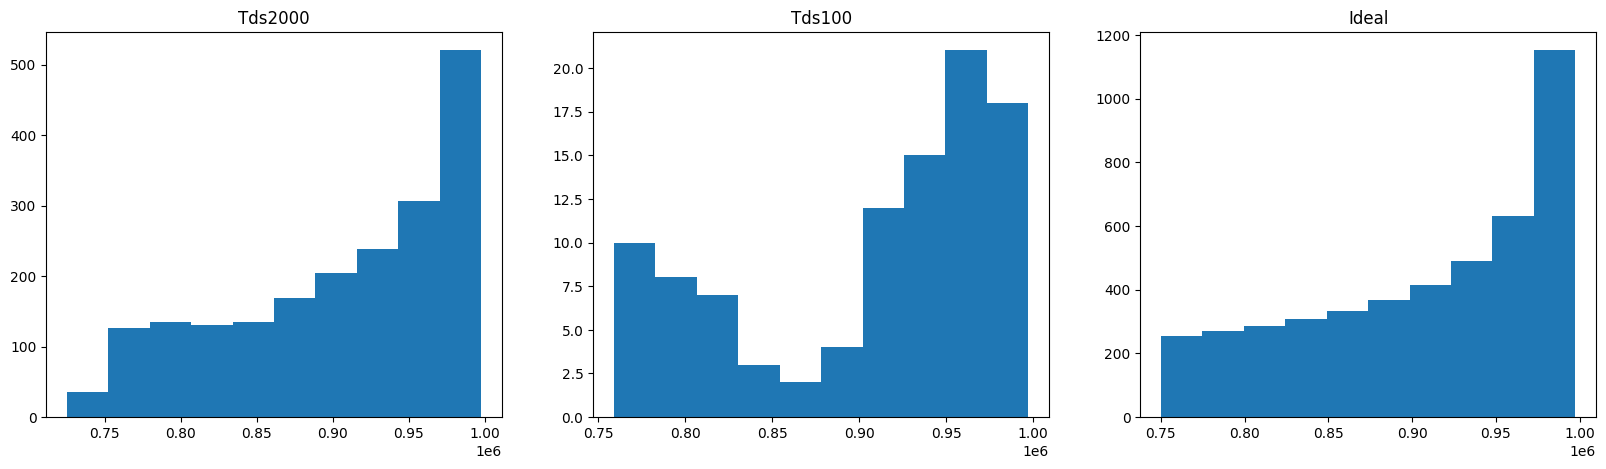

In [6]:
fig = plt.figure(figsize=(20, 5))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

ax1.hist(Tds)
ax1.set_title('Tds2000')
ax2.hist(Tds[:100])
ax2.set_title('Tds100')

y = []
for e in range(500, 5001):
    y.append((1000**2) - (1000**2)*((e/10000)**2))
ax3.hist(y)
ax3.set_title('Ideal')

print(pd.DataFrame(Tds).describe())
plt.show()

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:04<00:00, 400.33it/s]


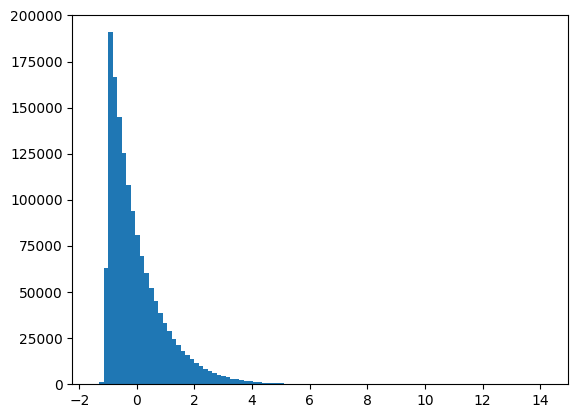

In [7]:
z = []
for f in tqdm(in_files):
    w, d, n, a = read_file(os.path.join(input_dir, f))
    a = np.array(a).flatten()
    # print('平均: {}, 中央値: {}, 標準偏差: {}, 最小: {}, 最大: {}'.format(a.mean(), np.median(a), a.std(), a.min(), a.max()))
    z = np.concatenate([z, (a - a.mean())/a.std()])
plt.hist(z, bins=100)
plt.show()